In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [365]:
df_transaction = pd.read_csv('kn_Transaction.csv', sep=";")
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [366]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [367]:
df_store = pd.read_csv('kn_Store.csv', sep=";")
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [368]:
df_customer = pd.read_csv('kn_Customer.csv', sep=";")
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [369]:
df_product = pd.read_csv('kn_Product.csv', sep=";")
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


# Data Preprocessing

In [370]:
df_transaction.duplicated().sum()

0

In [371]:
df_transaction.duplicated(subset=['TransactionID','CustomerID']).sum()

0

In [372]:
df_transaction[df_transaction.duplicated(subset=['TransactionID'], keep=False)].sort_values(by='TransactionID', ascending=False)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
2953,TR99533,314,31/07/2022,P6,18000,2,36000,3
2465,TR99533,178,25/06/2022,P1,8800,9,79200,10
495,TR96549,252,04/02/2022,P5,4200,4,16800,3
1878,TR96549,96,14/05/2022,P8,16000,2,32000,7
542,TR96509,298,08/02/2022,P9,10000,7,70000,12
...,...,...,...,...,...,...,...,...
3575,TR1280,60,17/09/2022,P10,15000,5,75000,2
574,TR12602,338,11/02/2022,P2,3200,7,22400,2
2079,TR12602,154,30/05/2022,P7,9400,6,56400,13
3022,TR11542,286,07/08/2022,P8,16000,1,16000,8


In [373]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

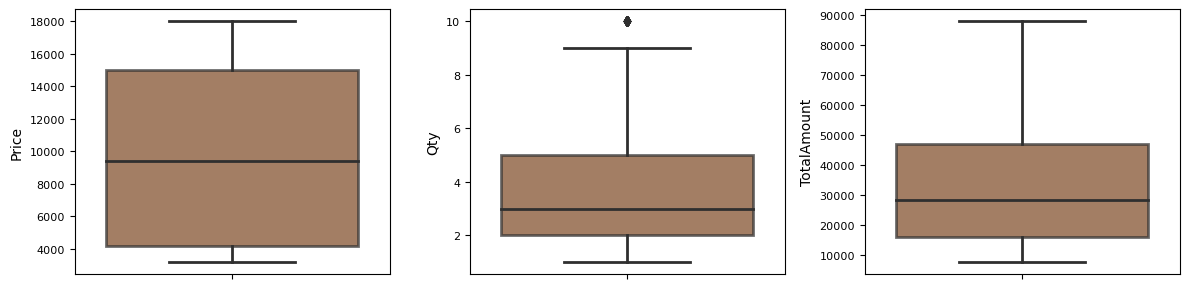

In [394]:
num = ['Price','Qty','TotalAmount']

from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df_transaction[num[i]], orient='v', color="#8B4513", boxprops=dict(alpha=0.7))
    plt.tight_layout()

plt.show()

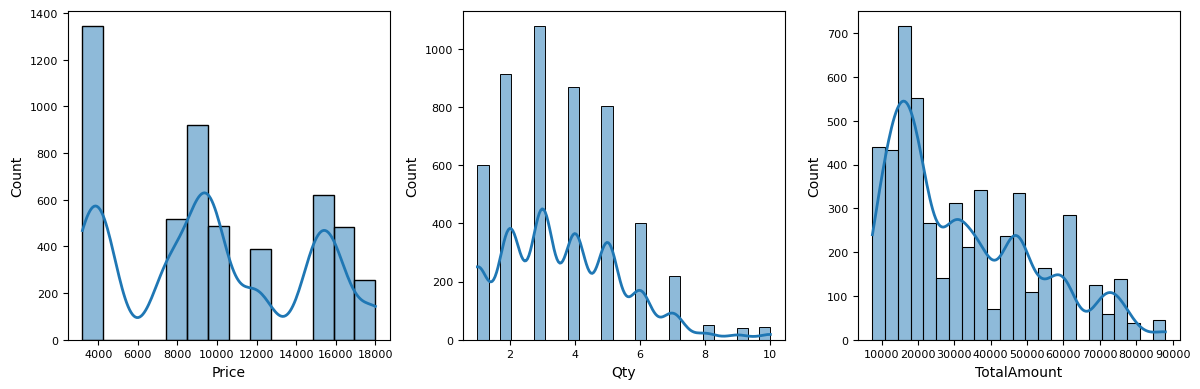

In [375]:
rcParams['figure.figsize'] = (12, 6)
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

num = ['Price','Qty','TotalAmount']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, ax in enumerate(axes.flat):
    if i < len(num):
        sns.histplot(df_transaction[num[i]], kde=True, ax=ax)
        #ax.set_title(num[i])
    else:
        ax.axis('off') 

plt.tight_layout()
plt.show()

In [376]:
df_ts = df_transaction.groupby('Date')['Qty'].sum().reset_index()
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Qty     365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [378]:
df_ts.head()

# Print all rows of the DataFrame
#print(df_ts.to_string(index=False))

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67


In [398]:
import plotly.express as px

# Membuat plot time series dengan hover text berisi tanggal
fig = px.line(df_ts, x='Date', y='Qty', title='Kalbe Sales Trend in 2022',
              hover_data={'Date': '|%d-%m', 'Qty': True})

fig.update_xaxes(title_text='Date', dtick='M1', tickformat='%b')
fig.update_yaxes(title_text='Total Qty')
fig.show()

In [340]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#train_data, test_data = df_ts[0:int(len(df_ts)*0.9)], df_ts[int(len(df_ts)*0.9):]

df_ts.set_index(df_ts.columns[0], inplace=True)

insample_end_date = '2022-11-30'
outsample_start_date = '2022-12-01'

insample_data = df_ts.loc[df_ts.index <= insample_end_date]
outsample_data = df_ts.loc[df_ts.index >= outsample_start_date]

# Splitting into train and test
train_data = insample_data
test_data = outsample_data

# Select the relevant columns for training and testing
train_arima = train_data[['Qty']]  # Convert to DataFrame
test_arima = test_data[['Qty']]    # Convert to DataFrame

In [341]:
train_arima.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


In [342]:
train_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2022-01-01 to 2022-11-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Qty     334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


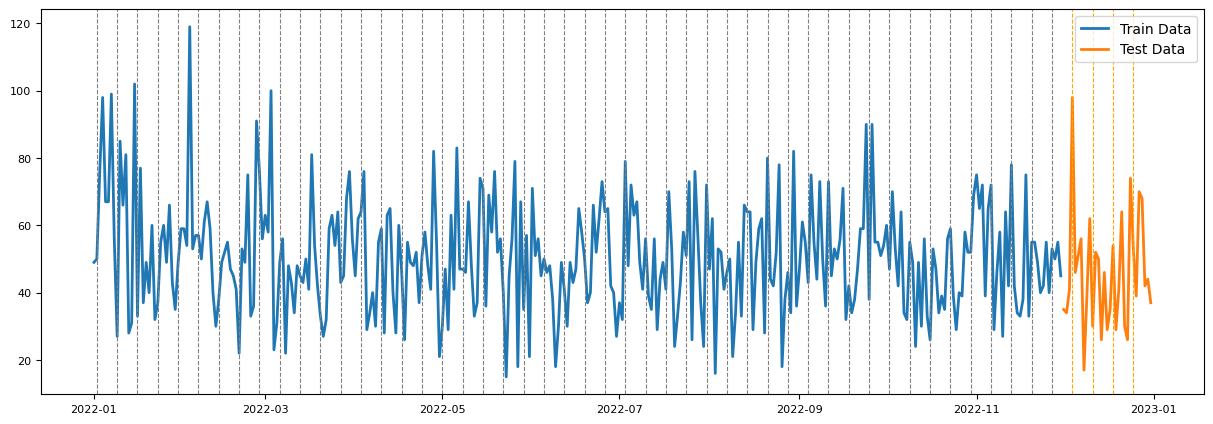

In [343]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(train_arima, label='Train Data')
ax.plot(test_arima, label='Test Data')

# Get the list of date indices that correspond to the end of each week (Sunday)
reference_dates_train = train_arima.index[train_arima.index.day_name() == 'Sunday']
reference_dates_test = test_arima.index[test_arima.index.day_name() == 'Sunday']

# Add reference lines for each end of week in train data
for date in reference_dates_train:
    ax.axvline(date, color='gray', linestyle='--', linewidth=0.8)

# Add reference lines for each end of week in test data
for date in reference_dates_test:
    ax.axvline(date, color='orange', linestyle='--', linewidth=0.8)

# Show the plot
plt.legend()
plt.show()

In [344]:
from pmdarima.arima import auto_arima

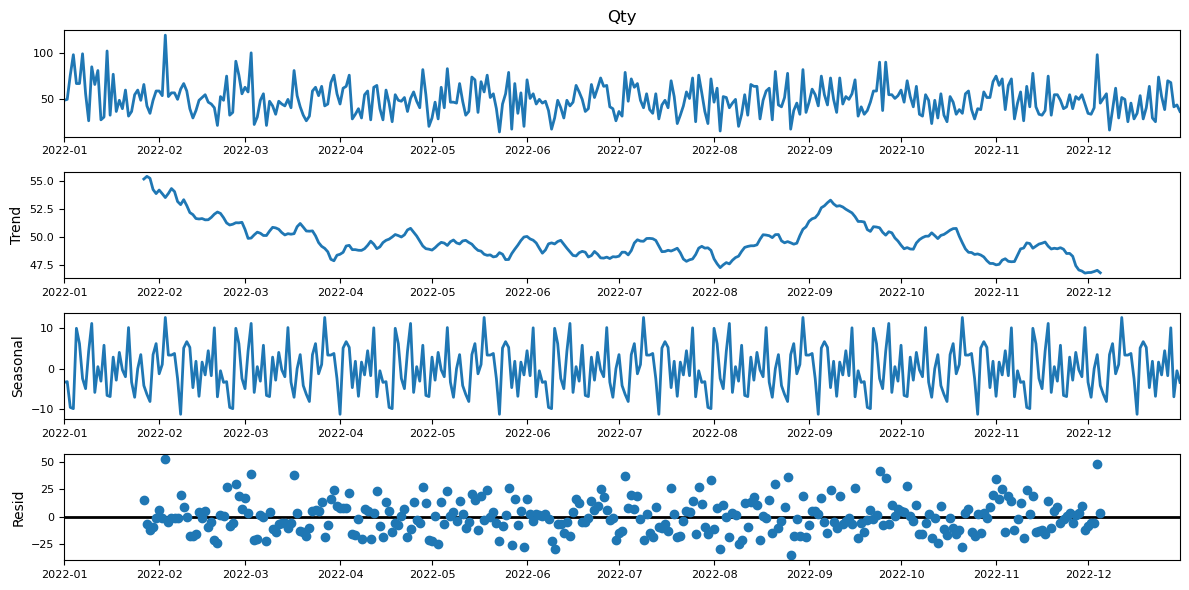

In [345]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = df_ts['Qty']
result = seasonal_decompose(series, period= 52)
result.plot()
pyplot.show()

In [346]:
time_series = df_ts
time_series['month'] = time_series.index.month
time_series['week'] = time_series.index.week
time_series['Week_of_Month'] = (time_series.index.day - 1) // 7 + 1

In [347]:
# Pivot table to rearrange the data for plotting
df_pivot = df_ts.pivot_table(index='Week_of_Month', columns='month', values='Qty', aggfunc='mean')
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
Week_of_Month,,,,,,,,,,,,
1,72.285714,64.142857,54.285714,50.000000,48.571429,52.428571,56.857143,45.285714,54.285714,52.857143,59.571429,51.571429
2,53.428571,49.142857,40.428571,48.571429,50.285714,36.428571,43.571429,46.142857,54.285714,42.142857,51.000000,39.428571
3,56.857143,45.000000,46.857143,44.571429,59.714286,48.571429,44.857143,53.000000,45.714286,38.142857,46.142857,42.571429
4,48.857143,59.428571,51.428571,52.714286,45.714286,60.571429,54.857143,45.428571,63.714286,45.714286,47.000000,51.428571
5,47.666667,NaN,66.666667,38.000000,37.666667,33.500000,44.333333,50.666667,52.500000,57.666667,50.000000,41.000000


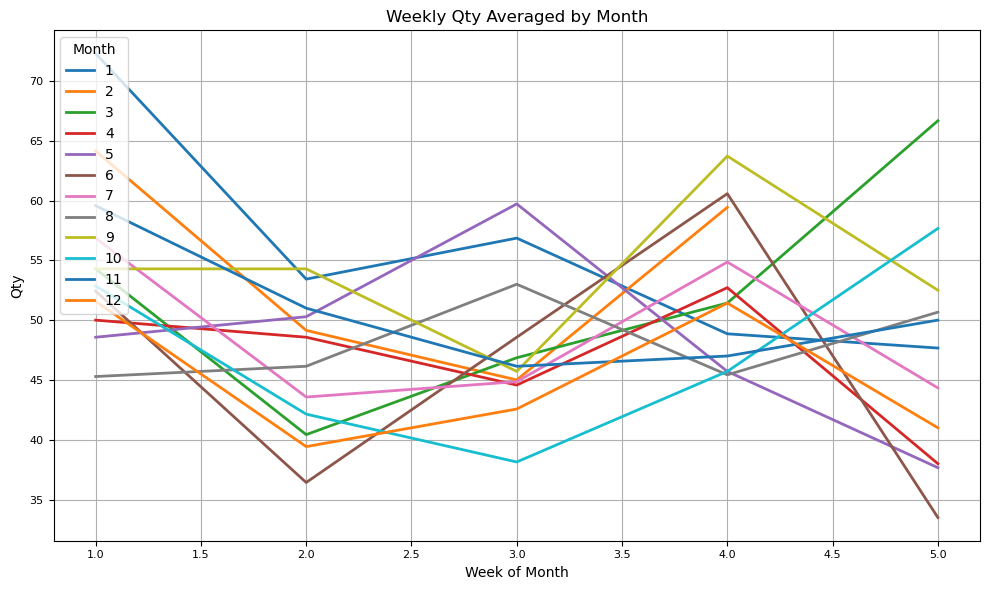

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))

# We will loop over each month, plotting a line for each one
for month in range(1, 13):
    plt.plot(df_pivot.index, df_pivot[month], label=month)

plt.xlabel('Week of Month')
plt.ylabel('Qty')
plt.title('Weekly Qty Averaged by Month')
plt.legend(title='Month', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [349]:
time_series = train_arima

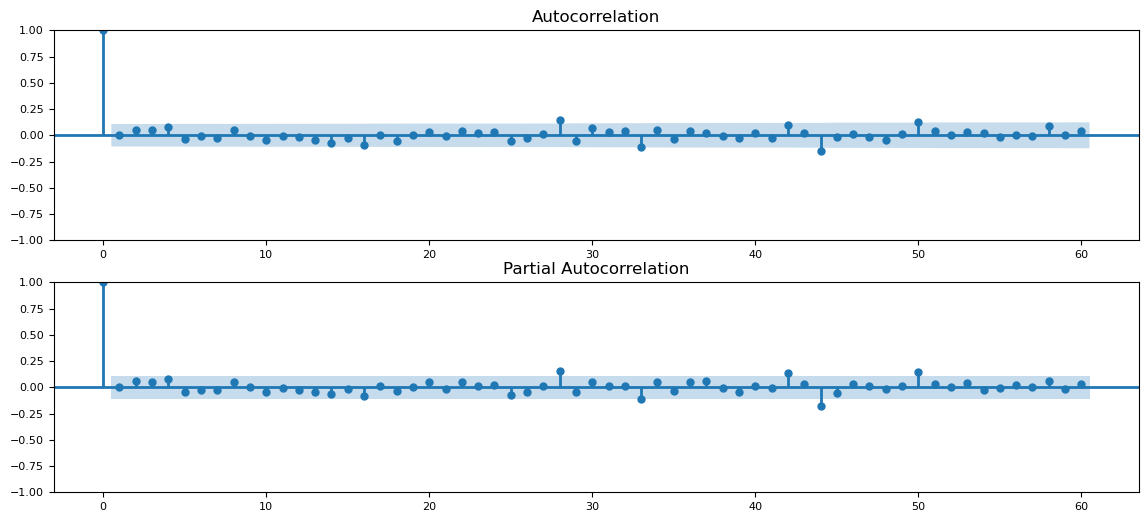

In [350]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(time_series, lags=60, ax=ax1)
ax2 = plot_pacf(time_series, lags=60, ax=ax2)
plt.show()

the ACF/PACF plots show a quick cut off after a small number of lags.

In [351]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.175873
p-value: 0.000000
Critical Test Statistics Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


the series is stationary since both ACF and PACF plots show a cut off into the 95% confidence interval (blue area) and the test statistic of the Dickey test is -18.17.

Hence we conclude that the time series is stationary.

Because we have daily data and expect a weekly seasonality, we should adjust the m parameter, which represents the seasonal period. In the context of daily data with weekly seasonality, there are 7 days in a week, so m should be set to 7.

Given the data, and considering that we want to set the trend and seasonality differentials manually:

- d=1 for differencing once for the trend.
- D=1 for differencing once for seasonality.
- m=7 / 12 / 52 since there's a weekly seasonality for daily data.
- trend='c' to include a constant.
- seasonal=True to fit a seasonal ARIMA.

In [297]:
from pmdarima import auto_arima
model = auto_arima(time_series['Qty'], d=1, D=1,seasonal=True, m=12, trend='c',start_p=0, start_q=0, max_order=70, 
                   test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3159.777, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2960.745, Time=1.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3047.458, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2926.306, Time=1.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3023.403, Time=1.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2882.255, Time=1.99 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2926.007, Time=1.05 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.13 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2865.573, Time=3.41 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2909.9

In [298]:
from pmdarima import auto_arima
model = auto_arima(time_series['Qty'], d=1, D=1,seasonal=True, m=7, trend='c',start_p=0, start_q=0, max_order=70, 
                   test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3229.744, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3024.196, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.82 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3113.508, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2989.674, Time=1.05 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=2915.960, Time=2.37 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(2,1,2)[7]             : AIC=inf, Time=2.30 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=3020.362, Time=1.66 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=2873.752, Time=3.04 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=2875.475, Time=2.35 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2951.167, Time=1.03 sec
 ARIMA(2,1,0)(2,1,2)[7]             : AIC=inf, Time=2.78 s

In [299]:
from pmdarima import auto_arima
model = auto_arima(time_series['Qty'], d=1, D=1,seasonal=True, m=52, trend='c',start_p=0, start_q=0, max_order=70, 
                   test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=11.58 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2779.296, Time=0.50 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=2638.506, Time=7.25 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=17.78 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2698.994, Time=0.78 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=2619.865, Time=16.68 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=inf, Time=60.66 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=18.88 sec
 ARIMA(0,1,0)(2,1,0)[52]             : AIC=2711.232, Time=13.60 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=33.71 sec
 ARIMA(1,1,1)(2,1,0)[52]             : AIC=inf, Time=58.39 sec
 ARIMA(0,1,1)(2,1,0)[52]             : AIC=inf, Time=51.78 sec
 ARIMA(2,1,1)(2,1,0)[52]             : AIC=inf, Time=66.25 sec
 ARIMA(1,1,0)(2,1,0)[52] intercept   : AIC=2619.865, Time=17.41 sec

Best model:  ARIMA(1,1,0)(2,1,0)[52]          


In [352]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_arima['Qty'],order=(1,1,0),seasonal_order=(2, 1, 0, 52))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

Results of SARIMAX on train
                                     SARIMAX Results                                      
Dep. Variable:                                Qty   No. Observations:                  334
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 52)   Log Likelihood               -1304.933
Date:                            Sat, 02 Sep 2023   AIC                           2617.865
Time:                                    23:58:47   BIC                           2632.419
Sample:                                01-01-2022   HQIC                          2623.702
                                     - 11-30-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5334      0.053    -10.018      0.000      -0.638      -0.429
ar.S.L5

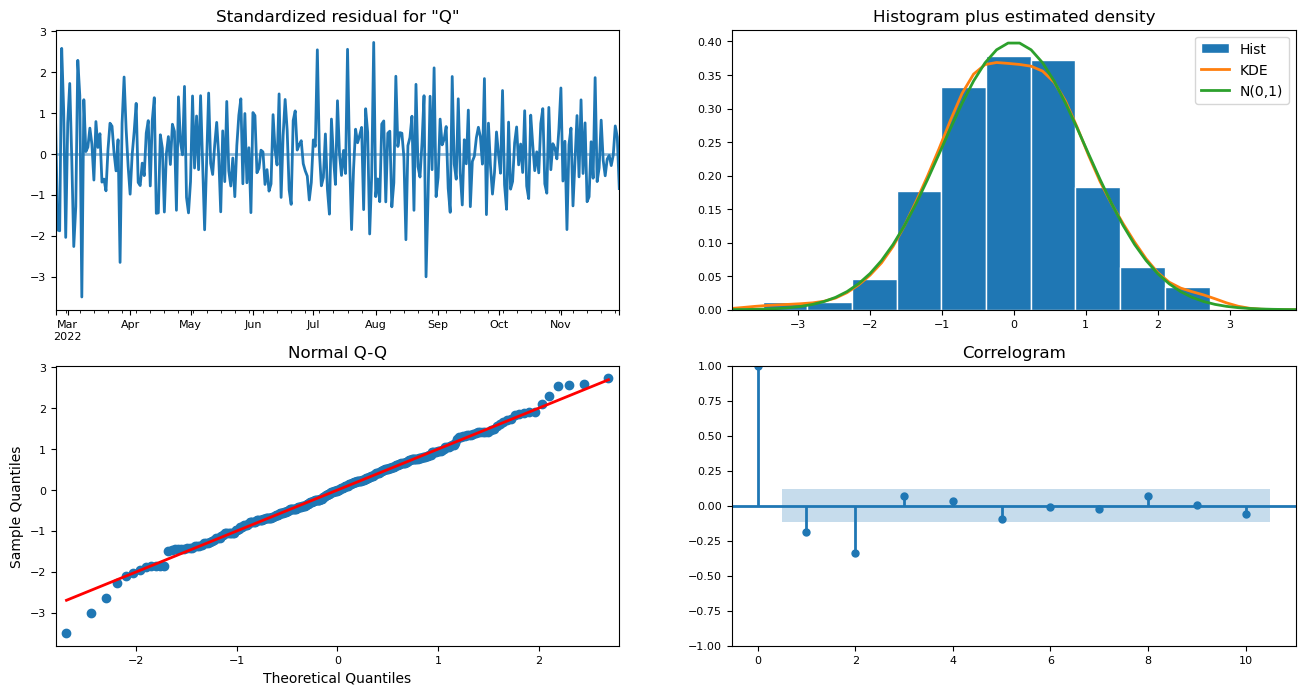

In [353]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

- From the normal Q-Q plot, we can see that we almost have a straight line, which suggest no systematic departure from normality. Also, the correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.
- The first plot on the left shows the residuals over time, we dont see any seasonality here. That’s good. The top-right plot shows that kde line (in red) closely follows the N(0,1) line (normal distribution with zero mean and standard deviation of 1) which confirms that the residuals are normally distributed.

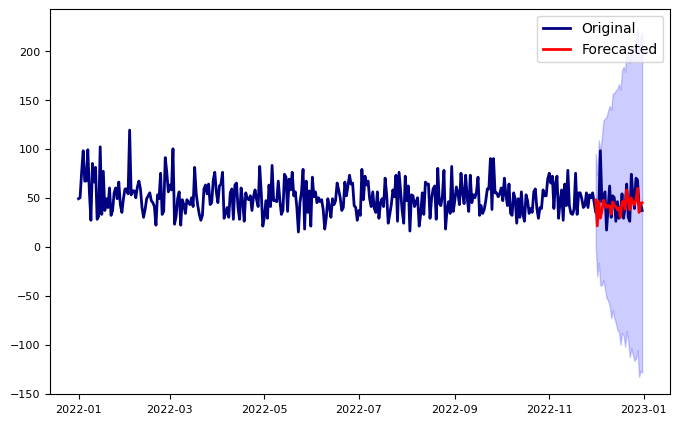

In [354]:
#Checking prediction value with test
forecast = results.get_forecast(steps=len(test_arima))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
plt.figure(figsize=(8,5))

# Plot past  levels
plt.plot(df_ts.index, df_ts['Qty'], label='Original', color = 'navy')
# Prediction Mean
plt.plot(d, mean, label='Forecasted', color= 'red')
# Shade of space between  confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2, color= 'blue')
# Plot legend 
plt.legend()
plt.savefig('p')
plt.show()

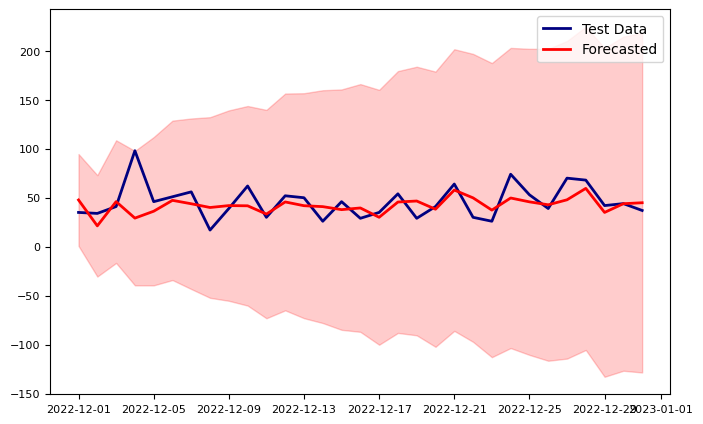

In [355]:
plt.figure(figsize=(8,5))

# Plot the test data
plt.plot(test_arima.index, test_arima, label='Test Data', color='navy')

# Plot the predicted/forecasted values
plt.plot(d, mean, label='Forecasted', color='red')

# Shade the space between the confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color='red')

# Add the legend
plt.legend()

# Save and show the plot
plt.savefig('p')
plt.show()

In [356]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. MSE and RMSE
mse = mean_squared_error(test_arima, mean)
rmse = mean_squared_error(test_arima, mean, squared=False)  # RMSE

# 2. MAE
mae = mean_absolute_error(test_arima, mean)

# 3. MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_arima, mean)

# 4. R-squared
# r2score = r2_score(test_arima, mean)

# Print metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)
# print("R-squared:", r2score)

MSE: 293.77162882578887
RMSE: 17.13976746708627
MAPE: 33.677439887580704
MAE: 12.075483538363917


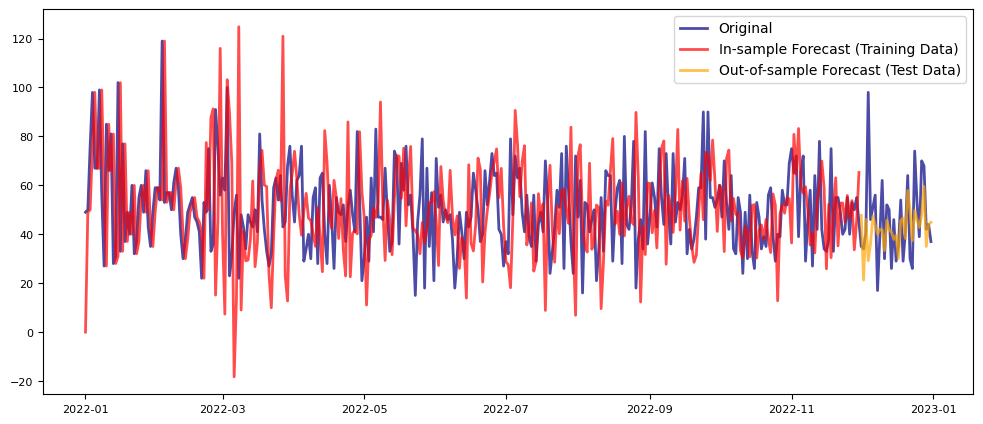

In [357]:
plt.figure(figsize=(12,5))

# Plot the original data with adjusted alpha
plt.plot(df_ts.index, df_ts['Qty'], label='Original', color='navy', alpha=0.7)

# Plot in-sample predictions (for train_arima) with adjusted alpha
plt.plot(train_arima.index, in_sample_mean, label='In-sample Forecast (Training Data)', color='red', alpha=0.7)

# Plot out-of-sample forecast (for test_arima) with adjusted alpha
plt.plot(d, mean, label='Out-of-sample Forecast (Test Data)', color='orange', alpha=0.7)

# Shade the space between the confidence intervals for test_arima (keeping this shading less prominent)
# plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color='blue')

# Add the legend
plt.legend()
plt.savefig('p')
plt.show()

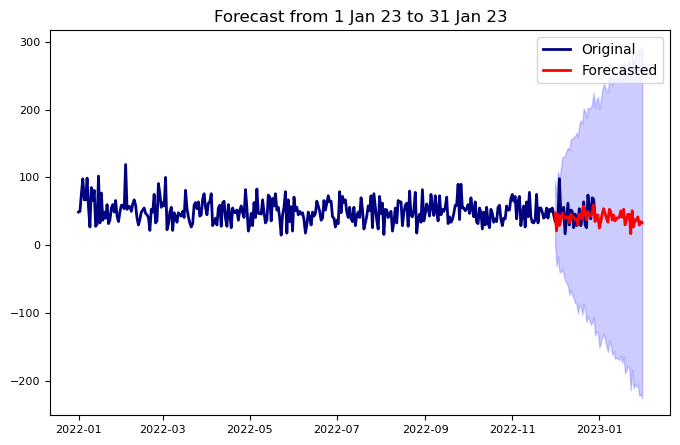

In [359]:
# Forecasting values 31 days into the future
forecast = results.get_forecast(steps=62)
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index

plt.figure(figsize=(8,5))

# Plot past levels
plt.plot(df_ts.index, df_ts['Qty'], label='Original', color='navy')

# Prediction Mean
plt.plot(d, mean, label='Forecasted', color='red')

# Shade of space between confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color='blue')

# Plot legend 
plt.legend()
plt.title("Forecast from 1 Jan 23 to 31 Jan 23")
plt.savefig('p')
plt.show()

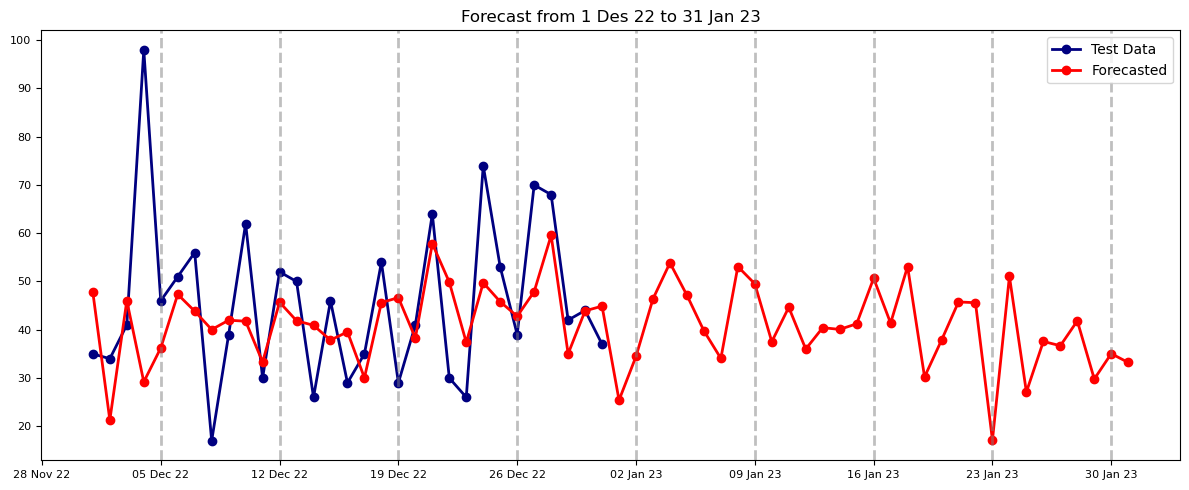

In [384]:
import matplotlib.dates as mdates
import pandas as pd

plt.figure(figsize=(12,5))

# Plot the test data with dot markers
plt.plot(test_arima.index, test_arima['Qty'], label='Test Data', color='navy', marker='o')

# Plot the forecast with dot markers
plt.plot(d, mean, label='Forecasted', color='red', marker='o')

# Highlight every Monday with a vertical line
mondays = pd.date_range(start=test_arima.index.min(), end=d[-1], freq='W-MON')
for monday in mondays:
    plt.axvline(x=monday, color='gray', linestyle='--', alpha=0.5)

# Plot legend 
plt.legend()

# Set x-ticks every week interval with Monday as the start
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=0, interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %y')) 

# Set rotation for x-axis labels
plt.xticks(rotation=0)

plt.title("Forecast from 1 Des 22 to 31 Jan 23")
plt.tight_layout()
plt.savefig('p')
plt.show()

1. **Dip at the Start of New Year:** January 2023 sees a dip in sales on the 1st, with a forecast of just 25.41 units. This could be due to a post-holiday reduction in demand, where consumers might be cutting back after the festive splurge or have ample leftover snacks from December.

2. **Mid-January Demand:** Similar to December, mid-January, especially around the 16th and 18th, observes increased sales, suggesting a trend where customers might be restocking snacks mid-month.

3. **End of January Consistency:** Towards the end of January, the forecasted sales figures stabilize around the mid-30s range. This might indicate a consistent demand for snacks, possibly as consumers revert to their routine snacking habits.

In summary, the forecasted data suggests a pattern of high demand at the start and mid-month, possibly influenced by the beginning of the month shopping trends and mid-month restocking. Additionally, external factors like holidays can play a significant role in influencing sales, as observed in December. The forecast provides valuable insights for the inventory team to ensure that the stock is adequately maintained during peak demand days, ensuring continuous availability of snack products for consumers.

## Business recommendation from forecast and clustering

Given the customer clustering and the January 2023 forecasted sales data, we can derive several insights and tailor business strategies:

1. **High-Value Cluster (Cluster 0)**:
   - These customers tend to make frequent transactions with higher quantities and overall purchase amounts. Given that they're responsible for a significant portion of sales, they will likely drive the predicted peak sales in January.
   - **Recommendation**: Prioritize stock availability for products popular within this segment, ensuring they never face stockouts. Special loyalty programs or early-access sales can be considered for this segment to further boost their purchase frequency in January.

2. **Mid-Value Cluster (Cluster 1)**:
   - These customers are moderately active, with average quantities and total purchase values. They contribute a stable flow to the overall sales figures. Some of these customers might upgrade to Cluster 0 behaviors if incentivized properly.
   - **Recommendation**: Since we anticipate a rise in sales in January 2023, it's essential to engage this group with targeted marketing campaigns, offering bundle deals or limited-time discounts. This can potentially shift their buying behavior closer to Cluster 0's pattern.

3. **Casual Buyers (Cluster 2)**:
   - This cluster has the least frequent transactions, lower quantities, and the lowest overall purchase values. However, given the right stimuli, they can be encouraged to shop more.
   - **Recommendation**: Given the forecasted sales for January, consider introducing special promotional offers to attract this segment. Since post-holiday sales often attract bargain hunters, this cluster might be more active in looking for deals. Make sure to have attractive entry-level offers or deals to draw them in.

**Leveraging the January Forecast**:
   - The forecast indicates certain peak sales days in January. Planning inventory based on the buying patterns of the three clusters can ensure optimal stock levels.
   - The peaks in January can be used to introduce new products or flavors, especially targeting the High-Value and Mid-Value clusters. Exclusive pre-launch access or discounts can encourage purchases.
   - Utilize the insights from clustering to create targeted advertising campaigns. For example, on predicted peak sales days, target Cluster 0 with premium products, Cluster 1 with bundle offers, and Cluster 2 with discounted items.
   - The forecast can help in optimizing staffing in retail outlets, ensuring high-service levels during peak days, especially for Cluster 0 customers.